In [29]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
# image_path=r"C:\Users\ML\Pictures\rose.jpg"
# read input and convert to grayscale
img = cv2.cvtColor(plt.imread('beautiful image.jpg'), cv2.COLOR_RGB2GRAY)


In [30]:
# ------------ apply Gaussian noise to the image ------------------ 

# sets the mean of the Gaussian distribution to 0.
mean = 0
# sets the variance of the Gaussian distribution to 500 (note: that here we use a large variance, 
# so that the noise can be noticed).
var = 3000
# calculates the standard deviation of the Gaussian distribution using the formula sigma = sqrt(var)
sigma = var ** 0.5
# generates a matrix of random numbers from a Gaussian distribution with mean = 0 and standard deviation = sigma.
# we used the img.shape so that the size of the matrix be the same as the size of the image
gaussian = np.random.normal(mean, sigma, img.shape)
# add the noise to the original image
noisy_image = img + gaussian


In [31]:
# --------------- arithmetic mean filter  -----------------------

# kernel (convolution matrix or mask) is a small matrix used for blurring, sharpening, embossing, edge detection, and more.
# it is a matrix with just 1 values in each pixel 
# in this line we creat a kernel matrix 5x5 (rows x columns)
# and then apply the normalization (scaling the kernel) to it : divid it with the number of values in the matrix (5x5=25)
kernel = np.ones((5, 5), np.float32) / 25
# applying the filter to the image by multiply the filter to each pixel (using mean filter)
arithmetic_mean_filtered = cv2.filter2D(noisy_image, -1, kernel)


In [32]:
# ------------- adaptive Wiener filter ------------------------

# scaling the image values to the range [0, 255] (CV_8U depth) and then rounding the value
noisy_image2 = cv2.convertScaleAbs(noisy_image)

filter_strength = 10
filter_window_size = 7
search_window_size = 21
# we used the parameter None so that the output image be as the same size and type as the input image.
wiener_filtered = cv2.fastNlMeansDenoising(noisy_image2, None, filter_strength, filter_window_size, search_window_size)


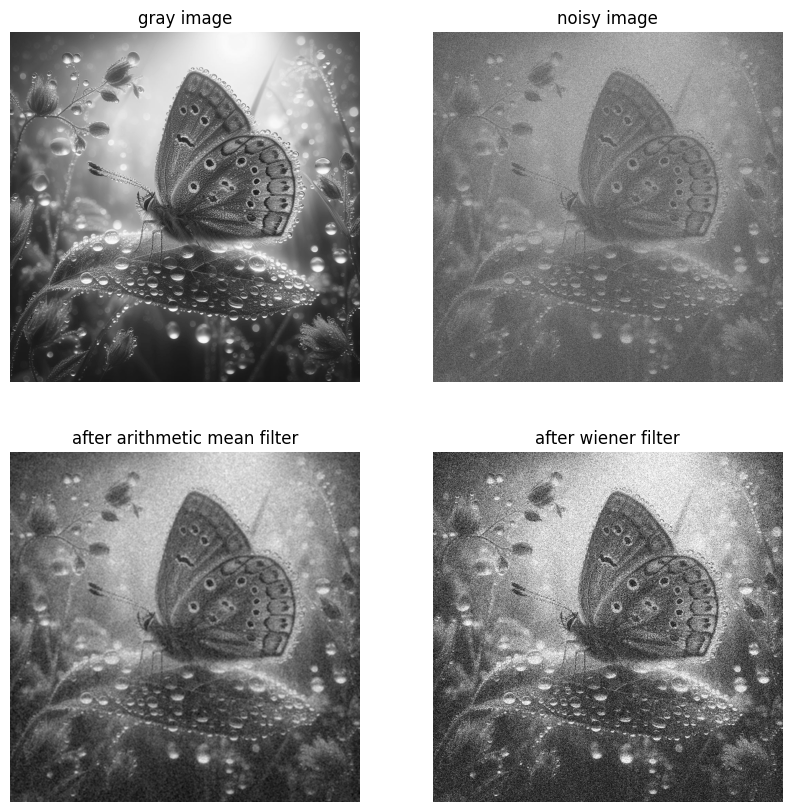

In [35]:
# ------------ output images -----------------
Fig = plt.figure(figsize=(10, 10)) 

Fig.add_subplot(2, 2, 1)
plt.imshow(img, cmap='gray')
plt.title("gray image")
plt.axis('off') 

Fig.add_subplot(2, 2, 2)
plt.imshow(Noisy_image, cmap='gray')
plt.title("noisy image")
plt.axis('off') 

Fig.add_subplot(2, 2, 3)
plt.imshow(Arithmetic_mean_filtered, cmap='gray')
plt.title("after arithmetic mean filter")
plt.axis('off') 

Fig.add_subplot(2, 2, 4)
plt.imshow(Wiener_filtered, cmap='gray')
plt.title("after wiener filter")
plt.axis('off') 

plt.show()


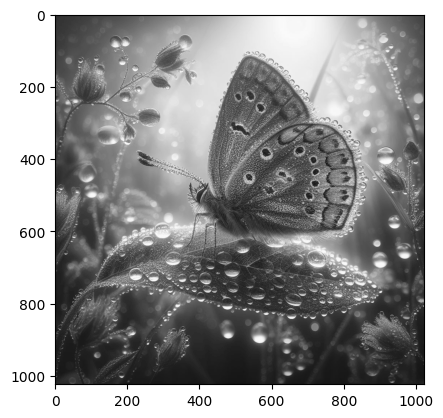

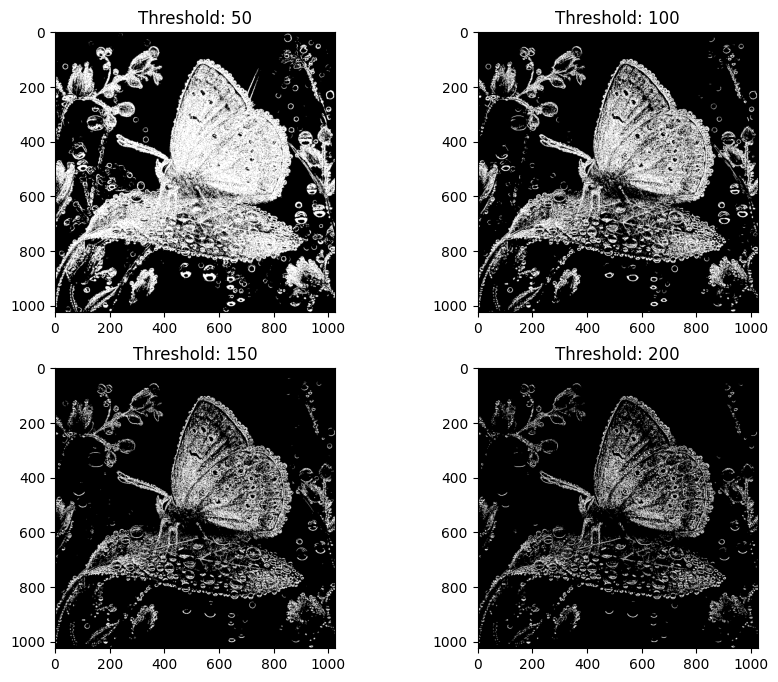

In [36]:

# import numpy as np
# import cv2
# import matplotlib.pyplot as plt
# image_path=r"C:\Users\ML\Pictures\rose.jpg"
# read input and convert to grayscale
img = cv2.cvtColor(plt.imread('beautiful image.jpg'), cv2.COLOR_RGB2GRAY)
plt.imshow(img,'gray')
# import matplotlib.pyplot as plt
# Apply Sobel filter
sobel_x = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)

# Combine gradients
gradient_magnitude = np.sqrt(sobel_x**2 + sobel_y**2)

# Apply thresholding with different values
threshold_values = [50, 100, 150,200]
result_images = []

for threshold in threshold_values:
    thresholded_image = np.zeros_like(gradient_magnitude)
    thresholded_image[gradient_magnitude > threshold] = 255
    result_images.append(thresholded_image)

# Plot the results
plt.figure(figsize=(10, 8))

for i in range(len(result_images)):
    plt.subplot(2, 2, i+1)
    plt.imshow(result_images[i], cmap='gray')
    plt.title(f'Threshold: {threshold_values[i]}')

plt.show()